# Pre-processing of CHIRPS precipitation dataset for Leeds Met Office Hackathon - Ministry for Food and Agriculture, Guana Group

#### Using Iris for NetCDF data load and processing

### __Extract daily rainfall for West Africa DROUGHT__

#### Imports

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline

import numpy as np

import os

import iris

import iris.quickplot as qplt

#### Set data path

In [ ]:
DATA_PATH = '/gws/pw/j05/cop26_hackathons/leeds/CHIRPS/'

#### Check variables of the NetCDF file

In [3]:
precip_path = iris.load(DATA_PATH + 'chirps.nc')
print (precip_path[0])

Climate Hazards group InfraRed Precipitation with Stations / (mm/day) (time: 14579; latitude: 400; longitude: 1440)
     Dimension coordinates:
          time                                                             x                -               -
          latitude                                                         -                x               -
          longitude                                                        -                -               x
     Attributes:
          Conventions: CF-1.6
          acknowledgements: The Climate Hazards Group InfraRed Precipitation with Stations development...
          comments:  time variable denotes the first day of the given day.
          creator_email: pete@geog.ucsb.edu
          creator_name: Pete Peterson
          date_created: 2015-10-07
          documentation: http://pubs.usgs.gov/ds/832/
          faq: http://chg-wiki.geog.ucsb.edu/wiki/CHIRPS_FAQ
          ftp_url: ftp://chg-ftpout.geog.ucsb.edu/pub/org/chg/prod

#### Load monthly precipitation data into an Iris cube

In [4]:
precip_path = os.path.join(DATA_PATH, 'chirps.nc')
print (precip_path)
precip = iris.load_cube(precip_path, 'Climate Hazards group InfraRed Precipitation with Stations')
precip.coord('latitude').guess_bounds()
precip.coord('longitude').guess_bounds()

D:/UoE/Projects/Thesis_Formulation_Report/Script/from_Panzure/chirps/chirps.nc


#### Plot some data

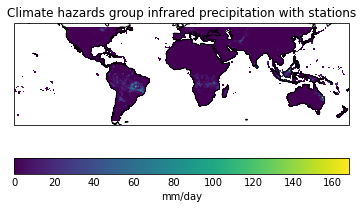

In [5]:
qplt.pcolormesh(precip[0]) # plot the first time in the cube
plt.gca().coastlines()

#### Extract West Africa region (by Courtesy of Jeff)

In [6]:
# Create a constraint for the latitude and Longitude extents 

W_Africa_lat = iris.Constraint(latitude=lambda v: v >= -20 and v <= 20 )
W_Africa_lon = iris.Constraint(longitude=lambda v: v > -10 and v <= 30 )

W_Africa_precip =  precip.extract(W_Africa_lat & W_Africa_lon) 

In [7]:
print (W_Africa_precip)

Climate Hazards group InfraRed Precipitation with Stations / (mm/day) (time: 14579; latitude: 162; longitude: 160)
     Dimension coordinates:
          time                                                             x                -               -
          latitude                                                         -                x               -
          longitude                                                        -                -               x
     Attributes:
          Conventions: CF-1.6
          acknowledgements: The Climate Hazards Group InfraRed Precipitation with Stations development...
          comments:  time variable denotes the first day of the given day.
          creator_email: pete@geog.ucsb.edu
          creator_name: Pete Peterson
          date_created: 2015-10-07
          documentation: http://pubs.usgs.gov/ds/832/
          faq: http://chg-wiki.geog.ucsb.edu/wiki/CHIRPS_FAQ
          ftp_url: ftp://chg-ftpout.geog.ucsb.edu/pub/org/chg/produ

#### Plot some data to check

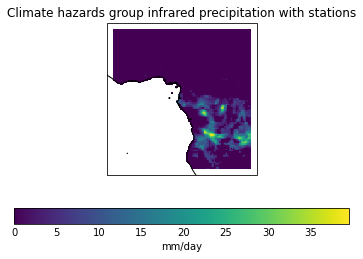

In [8]:
qplt.pcolormesh(W_Africa_precip[0]) # plot the rainfall in the first time step
plt.gca().coastlines()

#### Save to new NetCDF files for the extracted region

In [9]:
iris.save(W_Africa_precip, DATA_PATH + 'W_Africa_chirps.nc')

#### Open the NetCDF file for the extracted region

In [10]:
W_Africa_file = iris.load(DATA_PATH + 'W_Africa_chirps.nc')
W_Africa_precip = W_Africa_file[0]
print (W_Africa_precip)

Climate Hazards group InfraRed Precipitation with Stations / (mm/day) (time: 14579; latitude: 162; longitude: 160)
     Dimension coordinates:
          time                                                             x                -               -
          latitude                                                         -                x               -
          longitude                                                        -                -               x
     Attributes:
          Conventions: CF-1.7
          acknowledgements: The Climate Hazards Group InfraRed Precipitation with Stations development...
          comments:  time variable denotes the first day of the given day.
          creator_email: pete@geog.ucsb.edu
          creator_name: Pete Peterson
          date_created: 2015-10-07
          documentation: http://pubs.usgs.gov/ds/832/
          faq: http://chg-wiki.geog.ucsb.edu/wiki/CHIRPS_FAQ
          ftp_url: ftp://chg-ftpout.geog.ucsb.edu/pub/org/chg/produ